In [1]:
import sys, os
import numpy as np
from twoLayerNet import *
from mnist import load_mnist
from tqdm import tqdm
from matplotlib import pyplot as plt
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [3]:
network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

iters_num=10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []
test_loss_list = []

iter_per_epoch = max(train_size/batch_size,1)

In [4]:
for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate*grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test,t_test)
        test_loss = network.loss(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)


100%|███████████████████████████████████████████████████████████████| 10000/10000 [00:16<00:00, 622.65it/s]


In [5]:
print(train_loss_list)

[6.906212630393139, 6.903107040961338, 6.907648527654494, 6.90137359264327, 6.903878320426552, 6.903093084911614, 6.902200735145344, 6.901187829067072, 6.903138937749389, 6.899630724676756, 6.897421369654061, 6.8930855430520115, 6.885212847358953, 6.912216443148688, 6.90837515758543, 6.90217870529034, 6.918001265949102, 6.979472897287712, 7.046833022025915, 7.198551498529805, 7.625178530934583, 8.387481393032537, 11.69707433141313, 11.293556683311097, 14.634129146150707, 15.384617465735737, 16.012696003391103, 15.674401311936336, 15.939239899160253, 15.963390317597822, 15.957198879372227, 16.11809565095832, 16.118092085821687, 16.11809565095832, 16.11809565095832, 15.962936895731751, 15.95691469344883, 15.95691469344874, 15.95691469344874, 16.11809565095832, 15.95691469344874, 16.11809565095832, 15.956914693448736, 15.95691469344874, 15.956914693448736, 15.95691469344874, 15.95691469344874, 16.11809565095832, 15.956914693448736, 16.11809565095832, 16.11809565095832, 15.95691469344874, 

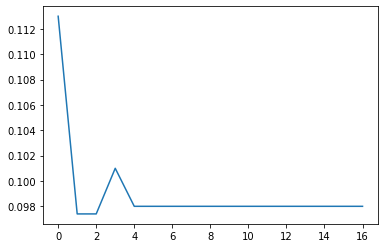

In [8]:
plt.plot(range(17),test_acc_list)

In [9]:
print(test_acc_list)

[0.113, 0.0974, 0.0974, 0.101, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098]


In [10]:
print(train_acc_list)

[0.11226666666666667, 0.09751666666666667, 0.09751666666666667, 0.10218333333333333, 0.09871666666666666, 0.09871666666666666, 0.09871666666666666, 0.09871666666666666, 0.09871666666666666, 0.09871666666666666, 0.09871666666666666, 0.09871666666666666, 0.09871666666666666, 0.09871666666666666, 0.09871666666666666, 0.09871666666666666, 0.09871666666666666]
